In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sooraj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# authentication
consumerKey = 'Hiding it due to security reason'
consumerSecret = 'Hiding it due to security reason'
accessToken = 'Hiding it due to security reason'
accessTokenSecret = 'Hiding it due to security reason'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [22]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

In [23]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,"""If you're innocent why are you taking the 5th..."
1,@crap4luck15 @TonyaVerdin @AngelaBelcamino @Re...
2,"Now, Donald Trump previously saying that takin..."
3,An author who ghostwrote one of Trump's books ...
4,@thehill Let’s be honest. Donald Trump needs h...
...,...
65,New York AG Letitia James's office to depose D...
66,I see Donald Trump took the fifth this morning...
67,https://t.co/vZj5oBsqy9\n\nDonald Trump invoke...
68,I thought he said only guilty people plead the...


In [24]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [25]:
tweet_df.head()

,0,cleaned_data
0,"""If you're innocent why are you taking the 5th...",If you re innocent why are you taking the 5th ...
1,@crap4luck15 @TonyaVerdin @AngelaBelcamino @Re...,It doesn t matter if the appointee is holding ...
2,"Now, Donald Trump previously saying that takin...",Now Donald Trump previously saying that taking...
3,An author who ghostwrote one of Trump's books ...,An author who ghostwrote one of Trump s books ...
4,@thehill Let’s be honest. Donald Trump needs h...,Let s be honest Donald Trump needs his pics to...


In [26]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [27]:
tweet_df.head()

,0,cleaned_data
0,"""If you're innocent why are you taking the 5th...",If you re innocent why are you taking the th A...
1,@crap4luck15 @TonyaVerdin @AngelaBelcamino @Re...,It doesn t matter if the appointee is holding ...
2,"Now, Donald Trump previously saying that takin...",Now Donald Trump previously saying that taking...
3,An author who ghostwrote one of Trump's books ...,An author who ghostwrote one of Trump s books ...
4,@thehill Let’s be honest. Donald Trump needs h...,Let s be honest Donald Trump needs his pics to...


In [28]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sooraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('all')

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [30]:
tweet_df['cleaned_data'].values

array(['if you re innocent why are you taking the th amendment donald trump a he take the th amendment',
       'it doesn t matter if the appointee is holding up the law if th',
       'now donald trump previously saying that taking the fifth is a mob like behavior and his spokeswoman sarah huckabee',
       'an author who ghostwrote one of trump s book speculates trump may ve taken white house document to one day sell a',
       'let s be honest donald trump need his pic to be backdated he look quite a bit older these day what w',
       'seriously david gergen it s hard to make a balanced judgment about donald trump you say that just after he',
       'what doe plead the fifth mean will donald trump do it',
       'donald trump right now',
       'remember that time donald trump pressured georgia s republican secretary of state to find him enough vote to ov',
       'i don t blame president trump they are running a parallel criminal investigation she ran saying sh',
       'i want to

In [31]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [32]:
tweet_df['cleaned_data'].values

array(['innocent taking th amendment donald trump take th amendment',
       'matter appointee holding law th',
       'donald trump previously saying taking fifth mob like behavior spokeswoman sarah huckabee',
       'author ghostwrote one trump book speculates trump may taken white house document one day sell',
       'let honest donald trump need pic backdated look quite bit older day w',
       'seriously david gergen hard make balanced judgment donald trump say',
       'doe plead fifth mean donald trump', 'donald trump right',
       'remember time donald trump pressured georgia republican secretary state find enough vote ov',
       'blame president trump running parallel criminal investigation ran saying sh',
       'want know probable cause wa maya wiley mar lago raid nation wa stunned fbi',
       'donald trump declined answer new york attorney general question invoking fifth amendment right',
       'see mob take fifth said innocent taking fifth amendment donald',
       'on

# 5

In [33]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [34]:
tweet_df['polarity'].value_counts()

Neutral              20
Weakly Positive      19
Positive             14
Negative             11
Weakly Negative       3
Strongly Positive     2
Strongly Negative     1
Name: polarity, dtype: int64

In [35]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [36]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [37]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.07870258709544423

In [38]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [39]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [40]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on donald trump by analyzing 70 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
20.00% people thought it was positive
27.14% people thought it was weakly positive
2.86% people thought it was strongly positive
15.71% people thought it was negative
4.29% people thought it was weakly negative
1.43% people thought it was strongly negative
28.57% people thought it was neutral


In [41]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

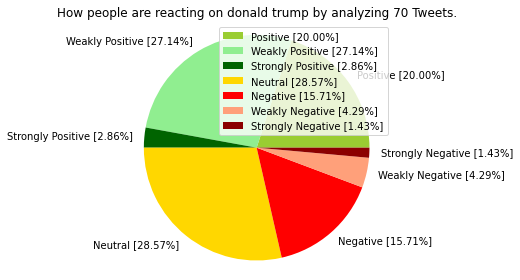

In [42]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()